In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester

mp_key = "V3MXH2I0Y7QlIPA7DnKaEb6MbSeygSrs"
mp_id = "mp-22990"

In [33]:
with MPRester(mp_key) as mpr:
    phonon_bandstructure = mpr.get_phonon_bandstructure_by_material_id(mp_id)
    
acoustic_branches = [0, 1, 2]

# Calcul des vitesses du son pour trois directions différentes
directions = ["X", "L", "K"]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
vitesse_son = {}

for direction in directions:
    for band in acoustic_branches:
        q_values = []
        frequencies = []
        
        for segment in phonon_bandstructure.branches:
            start, end = segment["start_index"], segment["end_index"]
            q_segment = phonon_bandstructure.qpoints[start:end]
            freq_segment = phonon_bandstructure.bands[band][start:end]
            
            # Vérification si la direction est correcte
            if direction in phonon_bandstructure.labels_dict:
                q_values.extend([np.linalg.norm(q.frac_coords) for q in q_segment])
                frequencies.extend(freq_segment)
        
        # Ajustement linéaire pour obtenir la pente (vitesse du son)
        if len(q_values) > 5:  # Vérifier qu'on a assez de points
            linear_fit = np.polyfit(q_values[:5], frequencies[:5], 1)
            speed = linear_fit[0] * 2 * np.pi * 1e12  # Conversion en m/s
            vitesse_son.setdefault(direction, []).append(speed)


Direction X:
  Branche 1: 13456822154561.13 m/s
  Branche 2: 15305041589156.50 m/s
  Branche 3: 29284170147077.90 m/s

Direction L:
  Branche 1: 13456822154561.13 m/s
  Branche 2: 15305041589156.50 m/s
  Branche 3: 29284170147077.90 m/s



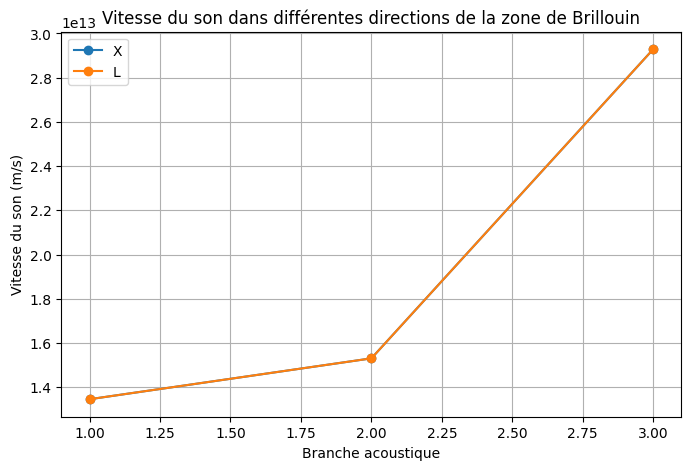

In [35]:
for direction, speeds in vitesse_son.items():
    print(f"Direction {direction}:")
    for i, speed in enumerate(speeds):
        print(f"  Branche {i+1}: {speed:.2f} m/s")
    print()

# Tracé des vitesses du son
plt.figure(figsize=(8, 5))
for direction, speeds in vitesse_son.items():
    plt.plot(range(1, 4), speeds, marker='o', label=direction)

plt.xlabel("Branche acoustique")
plt.ylabel("Vitesse du son (m/s)")
plt.title("Vitesse du son dans différentes directions de la zone de Brillouin")
plt.legend()
plt.grid()
plt.show()
